# **Análisis exploratorio y estadística**

# AE13 - Introducción a Conceptos y Visualización Estadística - Analizando Car Features


## <font color='blue'>**Introducción**</font>

**¿Cómo realizar análisis de datos exploratorios?**

Esta es una de esas preguntas que todos están interesados en conocer la respuesta. Bueno, la respuesta asi como en cualquier proyecto de ciencia de datos,  es que depende del conjunto de datos en el que esté trabajando. No existe un método o métodos comunes para realizar EDA, sin embargo en este notebook veremos algunos métodos y técnicas de uso frecuente en el proceso de EDA.

**¿Qué datos estamos explorando hoy?**

El primer conjunto de datos que exploraremos es sobre autos. El conjunto de datos se puede descargar desde [Car Features and MSRP](https://www.kaggle.com/CooperUnion/cardataset). El conjunto de datos, tiene aproximadamente 12.000 filas y 16 columnas, las cuales contienen características automóviles tales como: marca, modelo, tipo de combustible, potencia del motor, tipo de transmisión, rendimiento de combustible en carretera y ciudad (en millas por galón, MPG), entre otras. 

En este tutorial, exploraremos los datos y los prepararemos para el modelado.

## <font color='blue'>**Importando las librerias necesarias**</font>

Usualmente para realizar EDA, necesitaremos 4 librerias. La libreria `NumPy` para todo lo que necesitemos realizar con matrices y algebra lineal. `Pandas` para realizar el procesamniento del dataset, ordenarlo, agruparlo, integrarlo con otro dataset o filtrarlo. Finalmente, todo el proceso de visualización, utilizaremos principalemnte dos librerias `Seaborn` y `matplotlib`. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns                       #Visualizacion
import matplotlib.pyplot as plt             #visualization
%matplotlib inline     


## <font color='blue'>**Vamos a cargar los datos**</font>



Utilizaremos `Pandas` para cargar los datos en un DataFrame para su procesamiento. Por la extensión del archivo, podemos ver que los mismos vienen en formato `.csv` (separados por comas). 

In [ ]:
# Con esto debe dar permiso a google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Aqui debe cargar su ruta
#path = '/content/drive/MyDrive/Análisis Exploratorio y Estadística/Archivos/'
path = '/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/'
df = pd.read_csv(path + "data.csv")
# despleguemos las primeras 10 columnas, transpuestas
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Make,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011,2012,2012,2012,2012,2013
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335,300,300,230,230,230,300,300,230,230
Engine Cylinders,6,6,6,6,6,6,6,6,6,6
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2,2,2,2,2,2,2,2,2,2
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury,"Luxury,Performance","Luxury,Performance","Luxury,High-Performance",Luxury,Luxury


In [ ]:
df.tail(5)                        

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## <font color='blue'>**Verificando el tipo de dato**</font>


Aquí verificamos los tipos de datos, porque a veces algunos atributos no se almacenan con el tipo de dato correcto. Esto es importante al momento de realizar las visualizaciones. Al realizar la comparacion con los datos vemos que se han cargado de forma correcta. 

__Nota:__ cada vez que `Pandas` no es capaz de interpretar adecuadamente una columna o, incluso un único dato dentro de una columna, le asignará el tipo `object` a toda la columna.


In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

<font color="orangered">Object equivale a text</font>

## <font color='blue'>**Renombrando columnas**</font>

En este caso, la mayoría de los nombres de las columnas son muy confusos de leer, así que es mejor modificar los nombres de las columnas. 

In [ ]:
df = df.rename(columns={"Engine HP": "HP", 
                        "Engine Cylinders": "Cylinders", 
                        "Transmission Type": "Transmission", 
                        "Driven_Wheels": "Drive Mode",
                        "highway MPG": "MPG-H", 
                        "city mpg": "MPG-C", 
                        "MSRP": "Price" }) # Manufacturer's Suggested Retail Price
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


<font color="orangered">Para renombrar columnas se utiliza en formato de diccionario</font>

## <font color='blue'>**Eliminando filas duplicadas**</font>

Verifiquemos y eliminamos filas duplicadas. 

In [ ]:
df.shape

(11914, 16)

In [ ]:
duplicate_rows_df = df[df.duplicated()] #df.duplicated()
print("Numero de filas duplicadas: ", duplicate_rows_df.shape[0])

Numero de filas duplicadas:  715


In [ ]:
# Contamos las filas que hay en cada columna
df.count()      

Make                11914
Model               11914
Year                11914
Engine Fuel Type    11911
HP                  11845
Cylinders           11884
Transmission        11914
Drive Mode          11914
Number of Doors     11908
Market Category      8172
Vehicle Size        11914
Vehicle Style       11914
MPG-H               11914
MPG-C               11914
Popularity          11914
Price               11914
dtype: int64

In [ ]:
# Eliminamos las filas duplicadas
df = df.drop_duplicates() #df.drop_duplicates()

In [ ]:
# Y volvemos a contar
df.count()

Make                11199
Model               11199
Year                11199
Engine Fuel Type    11196
HP                  11130
Cylinders           11169
Transmission        11199
Drive Mode          11199
Number of Doors     11193
Market Category      7823
Vehicle Size        11199
Vehicle Style       11199
MPG-H               11199
MPG-C               11199
Popularity          11199
Price               11199
dtype: int64

## <font color='blue'>**Valores nulos**</font>

Este es un paso importante también y existen distintos métodos de completar los datos faltantes. Cuando el porcentaje de datos nulos es bajo, uno puede probar eliminando los registros y evaluar si es que algunos de los eliminados son relevantes. En caso de no eliminar los registros las formas más frecuentes de agregar un valor es incoprporar la media, mediana, sobre el total de la problación o respecto de un número de vecinos cercanos.  En este caso, veremos una columna con una cantidad significativa de datos faltantes (Market Category), la cual, en esta oportunidad decidiremos eliminar. Para el resto de  columnas con valores nulos, realizaremos una imputación.

**Nota**: Utilizaremos la librería ***Missingno***, la cual es una excelente biblioteca de Python, fácil de usar, y que proporciona una serie de visualizaciones para comprender la presencia y distribución de los datos faltantes dentro de un marco de datos de pandas. Esto puede ser en forma de gráfico de barras, gráfico de matriz, mapa de calor o dendrograma.

El método `info()` nos entrega una excelente visión de los `non-null`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11199 non-null  object 
 1   Model             11199 non-null  object 
 2   Year              11199 non-null  int64  
 3   Engine Fuel Type  11196 non-null  object 
 4   HP                11130 non-null  float64
 5   Cylinders         11169 non-null  float64
 6   Transmission      11199 non-null  object 
 7   Drive Mode        11199 non-null  object 
 8   Number of Doors   11193 non-null  float64
 9   Market Category   7823 non-null   object 
 10  Vehicle Size      11199 non-null  object 
 11  Vehicle Style     11199 non-null  object 
 12  MPG-H             11199 non-null  int64  
 13  MPG-C             11199 non-null  int64  
 14  Popularity        11199 non-null  int64  
 15  Price             11199 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memor

<font color="orangered">.info() muestra los registros no nulos y el tipo de registro</font>

Vemos que la columna `Market Category` tiene una cantidad significativa de nulos. Veamos esto con la librería __Missingno__.

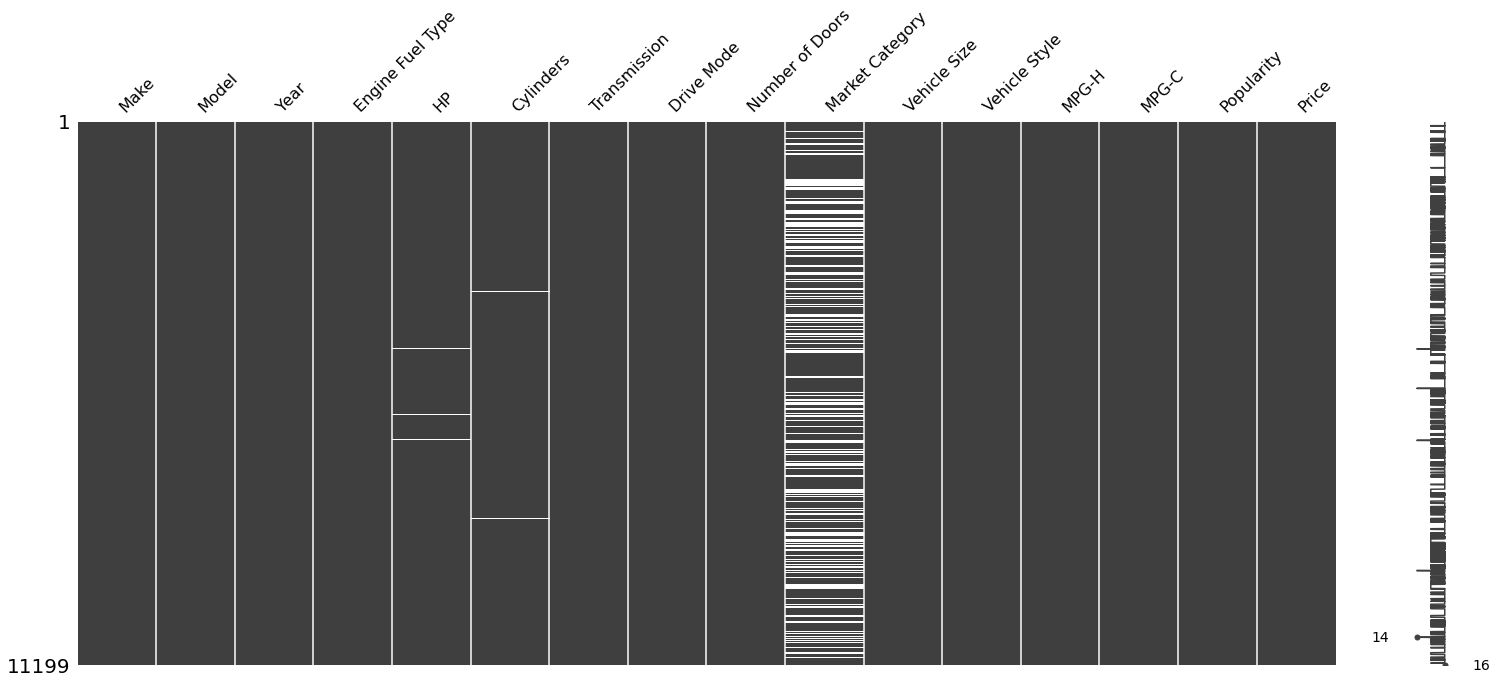

In [ ]:
import missingno as msno
%matplotlib inline

# Primero la función matrix
msno.matrix(df)
plt.show()

<p>
<font size="3" color="red"> En las lineas que quedan en blanco son los datos faltantes, aqui como se puede visualizar en la columna Market Category</font>
</p>

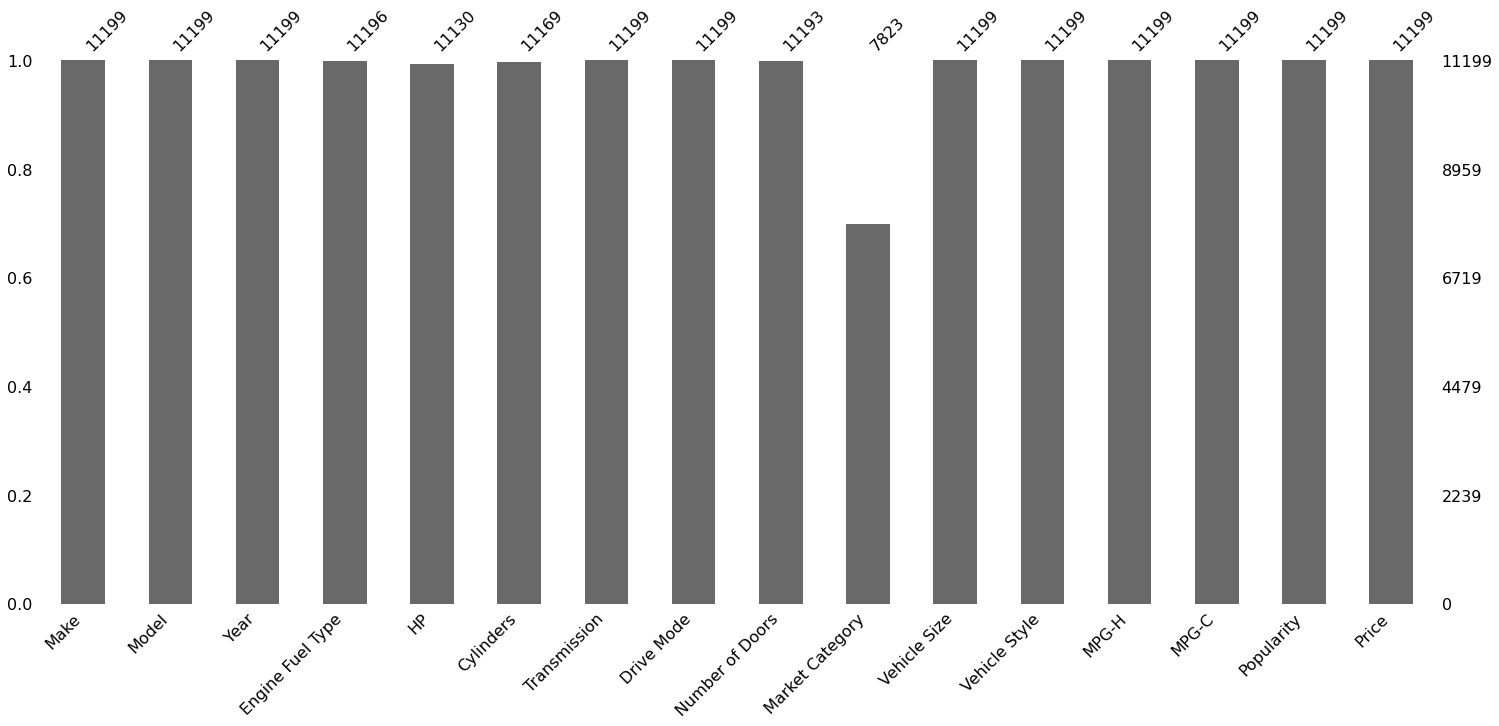

In [ ]:
# Segundo la función bar
msno.bar(df)
plt.show()

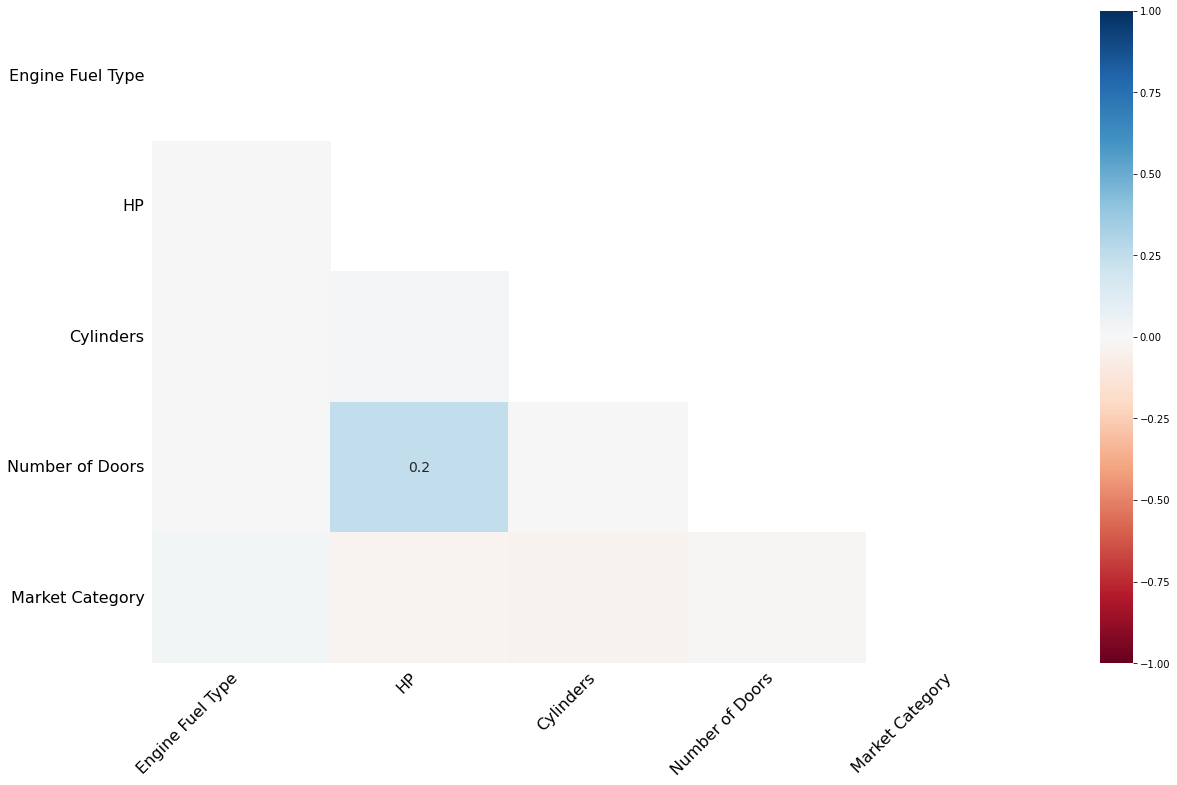

In [ ]:
# Tercero la función heatmap
msno.heatmap(df)
plt.show()

El mapa de calor se utiliza para identificar correlaciones de nulidad entre cada una de las diferentes columnas. En otras palabras, se puede utilizar para identificar si existe una relación en presencia de valores nulos entre cada una de las columnas.
Los valores cercanos a 1 positivo indican que la presencia de valores nulos en una columna está correlacionada con la presencia de valores nulos en otra columna.
Los valores cercanos a 1 negativo indican que la presencia de valores nulos en una columna no está correlacionada con la presencia de valores nulos en otra columna. En otras palabras, cuando hay valores nulos en una columna, hay valores de datos en la otra columna y viceversa.

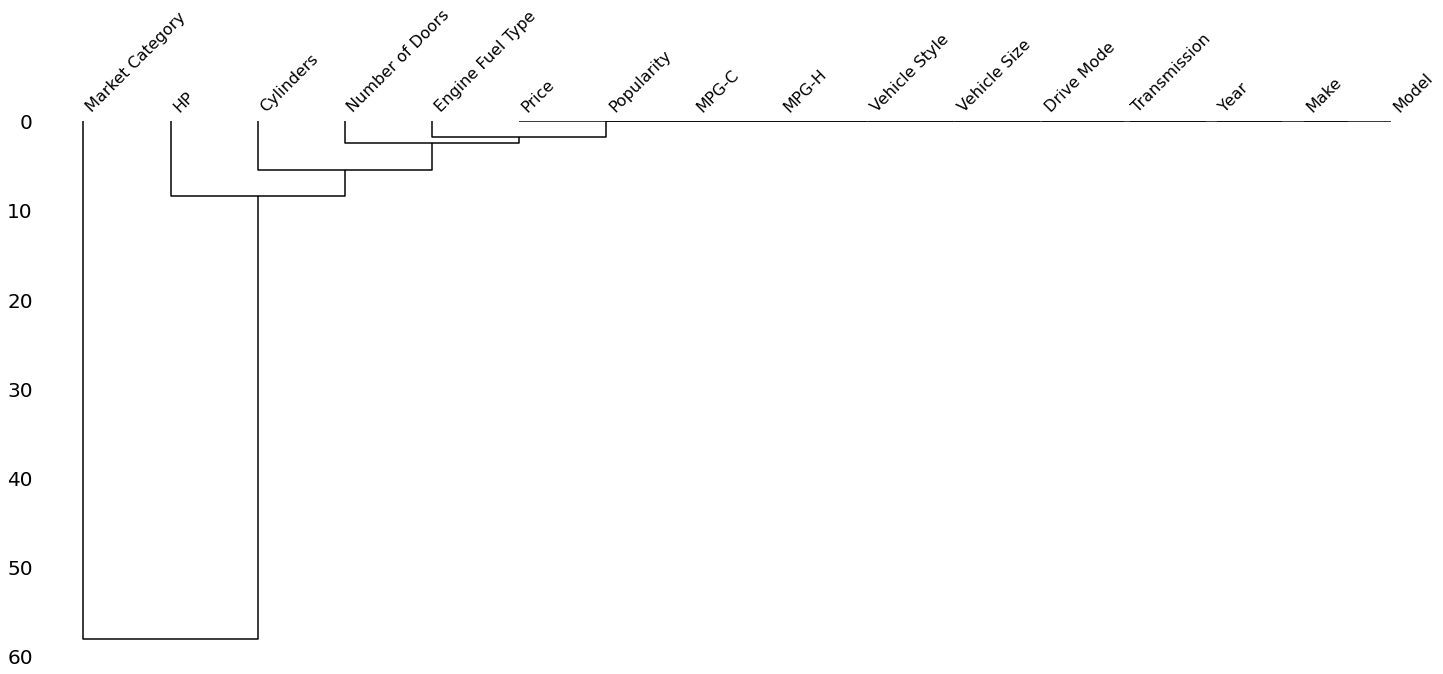

In [ ]:
# Y por último la dunción dendrogram
msno.dendrogram(df)
plt.show()

El gráfico de dendrograma proporciona un gráfico similar a un árbol generado a través de la agrupación jerárquica y agrupa columnas que tienen fuertes correlaciones en la nulidad.
Si varias columnas se agrupan en el nivel cero, la presencia de valores nulos en una de esas columnas está directamente relacionada con la presencia o ausencia de valores nulos en las otras columnas. Cuanto más separadas estén las columnas en el árbol, menos probable es que los valores nulos puedan correlacionarse entre las columnas.

Tal como dijimos, eliminaremos la columna `Market Category`. Atención que hay que ser muy cuidadosos con la decisión de eliminar columnas.

In [ ]:
df = df.drop(['Market Category'], axis=1)

In [ ]:
print(df.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64


In [ ]:
df = df.dropna()    # Borrando los valores nulos ya que son pocos. 
df.count()

Make                11097
Model               11097
Year                11097
Engine Fuel Type    11097
HP                  11097
Cylinders           11097
Transmission        11097
Drive Mode          11097
Number of Doors     11097
Vehicle Size        11097
Vehicle Style       11097
MPG-H               11097
MPG-C               11097
Popularity          11097
Price               11097
dtype: int64

Verifiquemos que no existan valores nulos

In [ ]:
# Verificamos nuevamente los nulos
print(df.isnull().sum())   

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


## <font color='green'>**Actividad 1**</font>


Realice una imputación de datos utilizando la media para las variables `HP` y `Cylinders`. Elimina las filas restantes que tengan valores nulos. 

In [ ]:
#Repetir lo anterior
df = pd.read_csv(path + "data.csv")

df = df.rename(columns={"Engine HP": "HP", 
                        "Engine Cylinders": "Cylinders", 
                        "Transmission Type": "Transmission", 
                        "Driven_Wheels": "Drive Mode",
                        "highway MPG": "MPG-H", 
                        "city mpg": "MPG-C", 
                        "MSRP": "Price" }) # Manufacturer's Suggested Retail Price

# Eliminamos las filas duplicadas
df = df.drop_duplicates()
df = df.drop(['Market Category'], axis=1)

df2 = df.copy()
df = df.dropna()    # Borrando los valores nulos ya que son pocos. 

df2[df2['HP'].isna()].head()



,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,27,18,61,62915


In [ ]:
df2['HP'] = df2['HP'].fillna(df2['HP'].mean()) #reemplaza vacios por su media
df2['Cylinders'] = df2['Cylinders'].fillna(df2['Cylinders'].mean()) #reemplaza vacios por su media
df2.iloc[539]


Make                                          FIAT
Model                                          500
Year                                          2016
Engine Fuel Type    premium unleaded (recommended)
HP                                             101
Cylinders                                        4
Transmission                                MANUAL
Drive Mode                       front wheel drive
Number of Doors                                  2
Vehicle Size                               Compact
Vehicle Style                          Convertible
MPG-H                                           40
MPG-C                                           31
Popularity                                     819
Price                                        24495
Name: 558, dtype: object

In [ ]:
df2 = df2.dropna() 
print(df2.isnull().sum())

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


<font color="orangered">o hay valores nulos</font>

<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Detectando outliers**</font>

Un valor atípico es un punto o conjunto de puntos que son diferentes de otros puntos. A veces pueden ser muy altos o muy bajos. A menudo, es una buena idea detectar y eliminar los valores atípicos.  Cuando se quieren analizar comportamientos frecuentes y obtener información de éstos, es una buena idea eliminar los puntos atípicos. En este caso utilizaremo el rango intercuartílico para realizar la detección y eliminación de valores atípicos. No es la única forma, pero se utiliza fecuentemente. Una técnica multidimensional para eliminar puntos atípicos es [db-scan](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).  

Cuando realizamos un análisis univariado, frecuentemente, los valores atípicos se pueden ver con visualizaciones usando un `box plo`t. A continuación, se muestra el box plot de `MSRP` (`Precio`), cilindros, caballos de fuerza y tamaño del motor. 

Puede probar otros también.


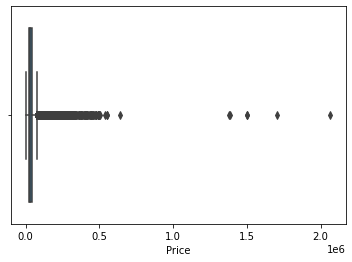

In [ ]:
sns.boxplot(x=df['Price']); # Añadimos un punto y coma para eliminar
                            # texto no deseado en la salida

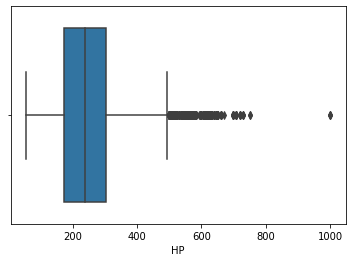

In [ ]:
sns.boxplot(x=df['HP'])

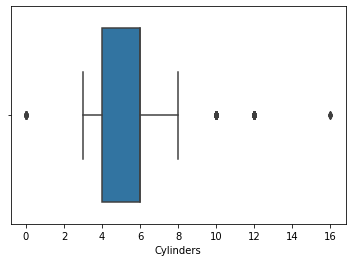

In [ ]:
sns.boxplot(x=df['Cylinders'])

<font color="orangered">En los 3 boxplots se observan valores outliers</font>

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
values = zip(Q1.index, Q1, Q3, IQR)
print(f'{"Atributo":20}{"Q1":>10}{"Q3":>10}{"IQR":>10}')
print('-'*50)
for i in values:
    print(f'{i[0]:20}{i[1]:10.1f}{i[2]:10.1f}{i[3]:10.1f}')

Atributo                    Q1        Q3       IQR
--------------------------------------------------
Year                    2007.0    2016.0       9.0
HP                       172.0     303.0     131.0
Cylinders                  4.0       6.0       2.0
Number of Doors            2.0       4.0       2.0
MPG-H                     22.0      30.0       8.0
MPG-C                     16.0      22.0       6.0
Popularity               549.0    2009.0    1460.0
Price                  21540.0   43020.0   21480.0


## <font color='green'>**Actividad 2**</font>
### Eliminando outliers

Elimine los puntos atípicos y desarrolle las mismas visualizaciones anteriores. Compárelas.

In [ ]:
# Calcule el límite inferior
out_inf = Q1 - 1.5 * IQR
out_inf

Year                1993.5
HP                   -24.5
Cylinders              1.0
Number of Doors       -1.0
MPG-H                 10.0
MPG-C                  7.0
Popularity         -1641.0
Price             -10680.0
dtype: float64

In [ ]:
# Calcule el límite superior
out_sup = Q3 + 1.5 * IQR
out_sup

Year                2029.5
HP                   499.5
Cylinders              9.0
Number of Doors        7.0
MPG-H                 42.0
MPG-C                 31.0
Popularity          4199.0
Price              75240.0
dtype: float64

In [ ]:
# Debemos alinear las columnas del DataFrame con el índice de la Serie
a1, a2 = df.align(out_inf, axis=1, copy=False)  

<font size="3" color="red"> 
En la variable **a1** deja el dataframe df con todas las columnas distintas de *out_inf*, y sus valores son *NaN*.<br>
En la variable **a2** deja la Serie out_inf con todas las columnas distintas de *df*, los que no estaban en la variable *out_inf* los deja como *NaN* para completar la estructura de columnas de **a1**. <BR>
</font>

In [ ]:
a2

Cylinders               1.0
Drive Mode              NaN
Engine Fuel Type        NaN
HP                    -24.5
MPG-C                   7.0
MPG-H                  10.0
Make                    NaN
Model                   NaN
Number of Doors        -1.0
Popularity          -1641.0
Price              -10680.0
Transmission            NaN
Vehicle Size            NaN
Vehicle Style           NaN
Year                 1993.5
dtype: float64

In [ ]:
# Verificamos que las columnas de a1 son las mismas que el indice de a2
a1.columns == a2.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
# Nuestro df es ahora a1
# lo alineamos con out_sup
a1, a3 = df.align(out_sup, axis=1, copy=False)

<font size="3" color="red"> 
En la variable **a1** deja el dataframe completo <br>
En la variable **a3** deja una columna con todos los valores superiores, de forma similar a **a2** <BR>

</font>

In [ ]:
# Generamos un nuevo DataFrame (df2) sin los outliers
df2 = a1[a1>a2][a1<a3] #subconjuntos sin outliers (Q1 +- 1.5 IQR)

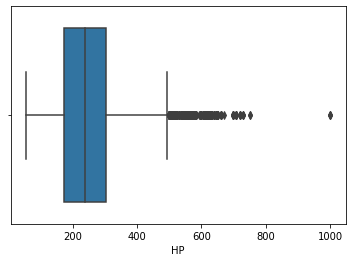

In [ ]:
# Visualiza 
sns.boxplot(x=df['HP']);

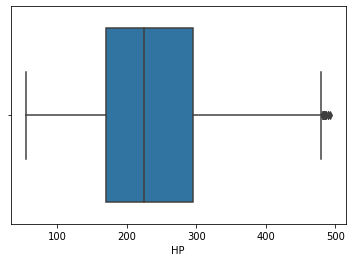

In [ ]:
sns.boxplot(x=df2['HP']);

<font color='green'>Fin Actividad 2</font>

## <font color='blue'>**Dibujar diferentes características entre sí (dispersión), histogramas y mapas de calor**</font>

### Histograma

El histograma se refiere a la frecuencia de aparición de variables en un intervalo. En este caso, hay principalmente 10 tipos diferentes de empresas de fabricación de automóviles, pero a menudo es importante saber quién tiene la mayor cantidad de automóviles. Hacer este histograma es una de las soluciones triviales que nos permite conocer el número total de automóviles fabricados por otra empresa.

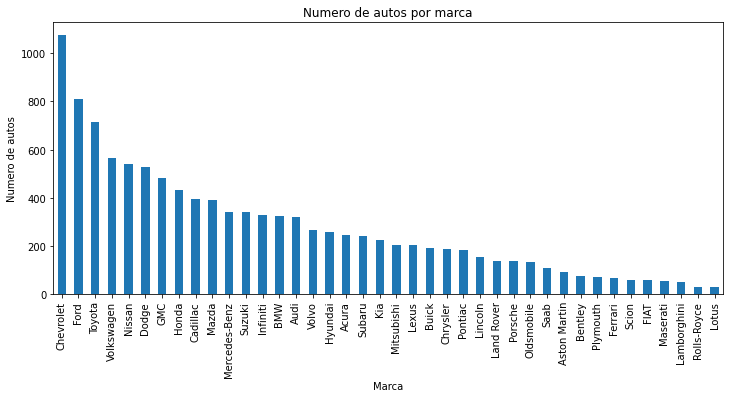

In [ ]:
# Tomamos el atributo fabricante (Make)
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(12,5)) #filtro de los 40 mayores
plt.title("Numero de autos por marca")
plt.ylabel('Numero de autos')
plt.xlabel('Marca')
plt.show()

## <font color='green'>**Actividad 3**</font>
1. Construya el histograma para la variable HP. Qué puede concluir de este histograma?
2. Construya el histograma para ``df2`` (sin outliers). Compare.

TIP: Utilice distintos valores de bins

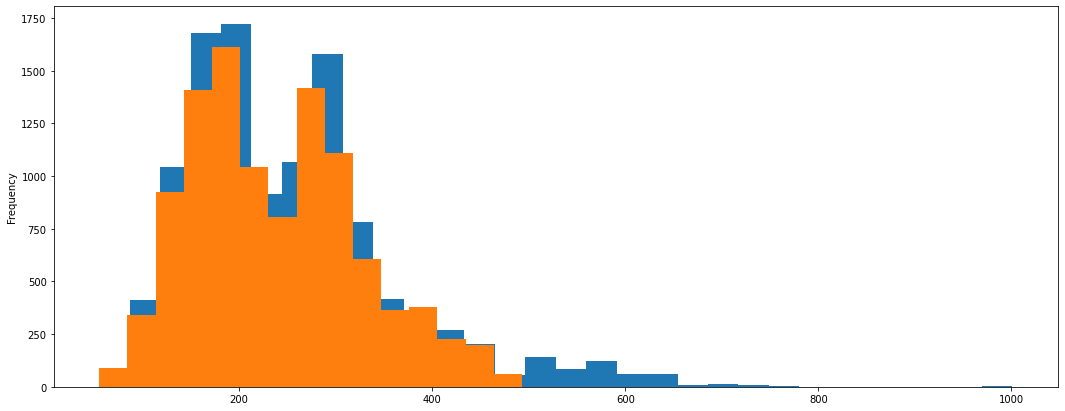

In [ ]:
# Tu código aquí ...
df['HP'].plot(kind='hist', bins=30, figsize=(18,7))
df2['HP'].plot(kind='hist', bins=15)
plt.show()

<font size="3" color="red"> 
El histograma **con** outliers el cual se visualiza de color azul, mientras que el histograma **sin** outliers el cual se visualiza de color naranja. Las frecuencias son similares, con excepción de los valores outliers a la derecha (cola derecha de la curva en azul). </font>

<font color='green'>Fin Actividad 3</font>

### Mapas de calor

El mapa de calor, es un tipo de gráfico que mide la relacion entre dos variables. Es necesario utilizar este diagrama para encontrar dependencia alta entre las variables. La dependencia alta entre variables,  puede impactar el desempeño de un algoritmo de aprendizaje automático. Una de las mejores formas de encontrar la relación entre las variables se puede realizar mediante mapas de calor. En el siguiente mapa de calor, sabemos que la función de precio depende principalmente de los caballos de fuerza y los cilindros.

In [ ]:
c = df.corr()
c.round(3)

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000,0.337,-0.027,0.246,0.266,0.220,0.087,0.209
HP,0.337,1.000,0.788,-0.128,-0.424,-0.475,0.041,0.659
Cylinders,-0.027,0.788,1.000,-0.148,-0.615,-0.634,0.043,0.552
Number of Doors,0.246,-0.128,-0.148,1.000,0.117,0.137,-0.059,-0.146
MPG-H,0.266,-0.424,-0.615,0.117,1.000,0.843,-0.025,-0.208
MPG-C,0.220,-0.475,-0.634,0.137,0.843,1.000,-0.007,-0.233
Popularity,0.087,0.041,0.043,-0.059,-0.025,-0.007,1.000,-0.048
Price,0.209,0.659,0.552,-0.146,-0.208,-0.233,-0.048,1.000


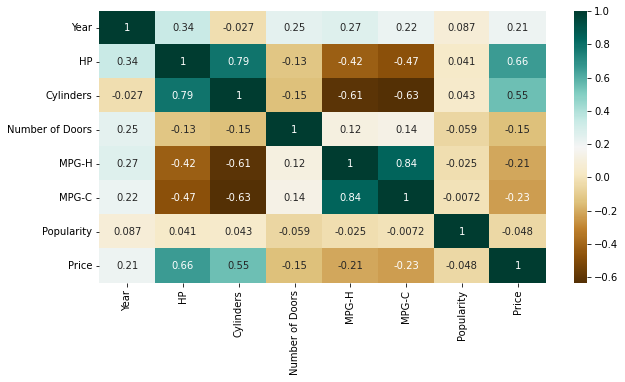

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(c,cmap="BrBG", annot=True) #cmap verde marrón
plt.show()

### Scatterplot

Generalmente usamos diagramas de dispersión para encontrar la correlación visual entre dos variables. Aquí, los diagramas de dispersión se trazan entre Caballos de fuerza y Precio y podemos ver el diagrama a continuación. Con el gráfico que se muestra a continuación, podemos dibujar fácilmente una línea de tendencia. 

Tambien se aprecia que hay dos grupos que se comportan distinto. Es probable que si quisieramos construir un predictor, estos comportamientos habria que diferenciarlos o buscar otras variables que relacionaran los puntos del grupo inferior. 

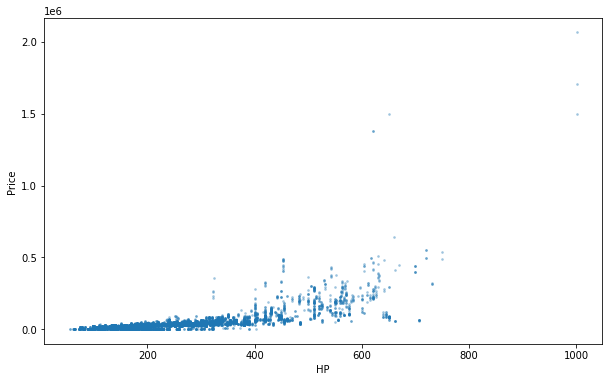

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'], alpha=0.3, s=3)
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()